## 机器学习中的曲线

Bias 与 Variance是什么？

* Bias：用来帮我们衡量训练模型达到了什么程度，我们希望模型的效果要更好，那就是Bias需要越小越好！
* Variance：训练集和测试此之间必然存在差异的，我们希望训练出来的模型应用能力更强（泛化能力），那么就需要Variance也是越小越好！

<img src="1.png" style="width:900px;height:280px;float:left">

这些模型看起来Bias都非常的小，但是这是我们想要的吗？

<img src="2.png" style="width:900px;height:280px;float:left">

为了泛化能力更强，我们不得不变换下策略。这些模型看起来泛化能力还不错，但是Bias却很大了,这是我们想要的吗？

## Tradeoff 需要找到合适的平衡点

<img src="3.png" style="width:500px;height:350px;float:left">

Bias和Variance是相爱相杀的

* 模型构建的越复杂Bias会越小，但是Variance也会越大
* 模型构建的越精简，Bias势必会增大，但是Variance也会相应减小

我们的目标是找到最合适的平衡点！

## 什么因素会对这俩哥们产生影响呢？先来看看数据集的大小！

<img src="4.png" style="width:500px;height:650px;float:left">

* 很明显，训练集样本点越少，其实我们越可以满足训练集的需求（模型在训练集上表现的更好），但是这样在验证集上却会很差！
* 但是随着训练集样本数量的增加可以看到在训练集上的效果好像也会也平均了，这很难满足每一个点的需求了，但是验证集的效果会更好一些！

## 训练集与验证集的学习曲线

<img src="5.png" style="width:600px;height:250px;float:left">

我们认为学习曲线会随着数据集的变换产生差异，那真是的数据集中的情况和我们假设的一致吗？

## 数据集：https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant#


Attribute Information:

Features consist of hourly average ambient variables 
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

先来看看我们的数据长啥样

In [4]:
import pandas as pd

electricity = pd.read_excel('Folds5x2_pp.xlsx')

print(electricity.info())
electricity.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB
None


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56


验证一下不同训练集的大小对结果的影响

In [5]:
train_sizes = [1, 100, 500, 2000, 5000, 7654]

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

features = ['AT', 'V', 'AP', 'RH']
target = 'PE'

train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = LinearRegression(), X = electricity[features],
                                                   y = electricity[target], train_sizes = train_sizes, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

In [7]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[ -0.          -0.          -0.          -0.          -0.        ]
 [-19.71230701 -18.31492642 -18.31492642 -18.31492642 -18.31492642]
 [-18.14420459 -19.63885072 -19.63885072 -19.63885072 -19.63885072]
 [-21.53603444 -20.18568787 -19.98317419 -19.98317419 -19.98317419]
 [-20.47708899 -19.93364211 -20.56091569 -20.4150839  -20.4150839 ]
 [-20.98565335 -20.63006094 -21.04384703 -20.63526811 -20.52955609]]

 ----------------------------------------------------------------------

Validation scores:

 [[-619.30514723 -379.81090366 -374.4107861  -370.03037109 -373.30597982]
 [ -21.80224219  -23.01103419  -20.81350389  -22.88459236  -23.44955492]
 [ -19.96005238  -21.2771561   -19.75136596  -21.4325615   -21.89067652]
 [ -19.92863783  -21.35440062  -19.62974239  -21.38631648  -21.811031  ]
 [ -19.88806264  -21.3183303   -19.68228562  -21.35019525  -21.75949097]
 [ -19.9046791   -21.33448781  -19.67831137  -21.31935146  -21.73778949]]


这里对于训练集和验证集分别得到了6次结果，因为我们做了6种不同大小的训练集，每次的结果由5次交叉验证组成。

为了对比，我们选择交叉验证的平均结果来观察。

In [8]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1       -0.000000
100     18.594403
500     19.339921
2000    20.334249
5000    20.360363
7654    20.764877
dtype: float64

 --------------------

Mean validation scores

 1       423.372638
100      22.392186
500      20.862362
2000     20.822026
5000     20.799673
7654     20.794924
dtype: float64


来观察一下我们得到的曲线

(0, 40)

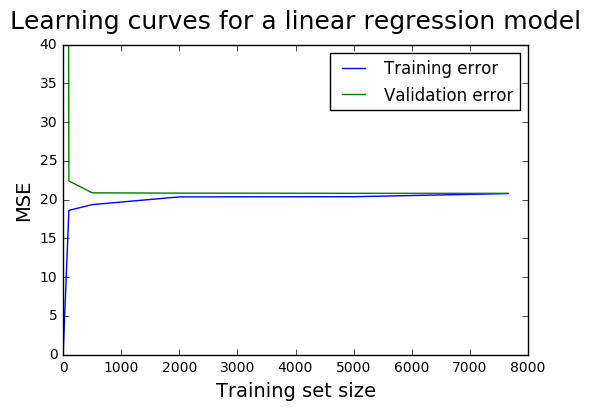

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)

结果确实跟我们之前的假设是一样的

那么数据集一定是越多越好吗？理论上肯定是的，但是实际上会有饱和点的。

<img src="6.png" style="width:600px;height:250px;float:left">

当我们观察到结果是左图的时候我们的核心应该想一想怎么样构建模型来增强效果，当结果是右图的时候我们首先就得先从数据下手了

## Bias与Variance在曲线中的含义

<img src="7.png" style="width:600px;height:250px;float:left">

<img src="8.png" style="width:600px;height:250px;float:left">

那么如何得到更好的模型呢？
* 根据我们的曲线，是数据的问题找数据的问题，是算法的问题找算法的问题。有针对性的！

## low bias and high variance

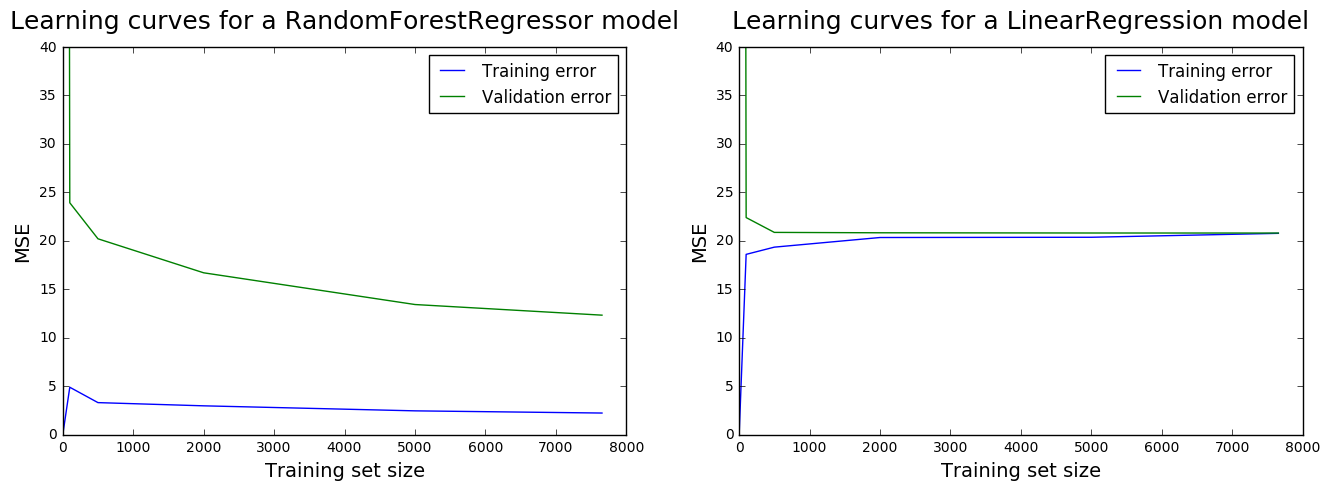

In [14]:
def learning_curves(estimator, data, features, target, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(
                                                 estimator, data[features], data[target], train_sizes = train_sizes,
                                                 cv = cv, scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)
    
    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,40)


### Plotting the two learning curves ###

from sklearn.ensemble import RandomForestRegressor

plt.figure(figsize = (16,5))

for model, i in [(RandomForestRegressor(), 1), (LinearRegression(),2)]:
    plt.subplot(1,2,i)
    learning_curves(model, electricity, features, target, train_sizes, 5)

对比发现，线性回归模型没有发生过拟合的现象，但是基本也就优化到这样了，没多大的空间了，那么随机森林呢？

看起来随机森林有些过拟合了

* 我们需要更多的数据来帮助它！
* 加入正则化等精简模型方法来优化！

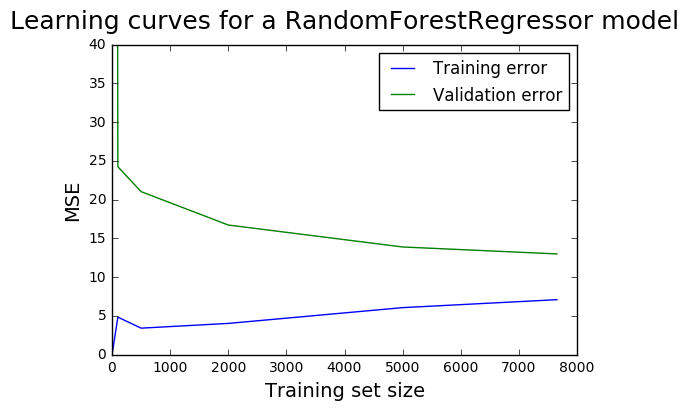

In [16]:
learning_curves(RandomForestRegressor(max_leaf_nodes = 350), electricity, features, target, train_sizes, 5)

variance明显降低了，所以调参是一个很好的方法帮助我们优化模型

模型大致我们用下面的公式来理解

<img src="9.png" style="width:358px;height:40px;float:left">

* 这里有可减小的错误和不可减少的错误，也就是我们要做的是通过模型，算法，数据尽可能的让可减小的错误为0.
* 但是不可减小的错误是不可能剔除掉的，这就是现实社会！

## 我们的目标：
* 尽可能让模型Bias达到最小的同时保证Variance尽可能的小

<img src="10.png" style="width:400px;height:300px;float:left">

## 我们讨论的回归问题是这样，分类问题呢？
* 对于分类问题来说，变的只是评估的标准，如果用精度来衡量，那就是越高越好了！

<img src="11.png" style="width:500px;height:400px;float:left">